## Demo
Rosenbaum's test implementation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import networkx as nx
import pandas as pd
import sys
sys.path.append("..")
from rosenbaum import *
import matplotlib.pyplot as plt

will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.


In [3]:
help(rosenbaum)

Help on function rosenbaum in module rosenbaum.rosenbaum:

rosenbaum(adata, group_by, test_group, reference='rest', metric='mahalanobis', rank=False, k=None, nx=False)
    Perform Rosenbaum's matching-based test for checking the association between two groups 
    using a distance-based matching approach.
    
    Parameters:
    -----------
    data : anndata.AnnData or pd.DataFrame
        The input data containing the samples and their respective features. If the input is an
        `AnnData` object, the samples and their corresponding features should be stored in `data.X` and the
        group labels in `data.obs[group_by]`. If using a `pandas.DataFrame`, the group labels should be in the
        column specified by `group_by`, and the feature matrix should be the remaining columns.
    
    group_by : str
        The column in `data.obs` or `data` (in case of a `pandas.DataFrame`) containing the group labels.
        The values of this column should include the `test_group` and po

In [4]:
samples_A = [np.random.normal(0, 1, 2) for _ in range(5)]
samples_B = [np.random.normal(0, 1, 2) for _ in range(3)]
samples_C = [np.random.normal(5, 1, 2) for _ in range(11)]

groups = ["A"] * 5 + ["B"] * 3 # + ["C"] * 11
samples = np.array(samples_A + samples_B) # + samples_C)
adata = ad.AnnData(samples)
adata.obs["Group"] = groups

In [13]:
(p_val, z, support), nx_matching, nx_G  = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=2, nx=True)
print("P-value", p_val, "Z-score", z, "Relative support", support)

Original group counts:
Group
A    5
B    3
Name: count, dtype: int64
Filtered and downsampled samples:
Group
A    5
B    3
Name: count, dtype: int64
matching samples.
calculating PCA and kNN graph.
extracting connectivities.
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0.]]
assembling edges
counting cross matches
P-value 1.0 Z-score 0.8660254037844387 Relative support 1.0


/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [14]:
(p_val, z, support), gt_matching, gt_G = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=2, nx=False)
print("P-value", p_val, "Z-score", z, "Relative support", support)

/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


Original group counts:
Group
A    5
B    3
Name: count, dtype: int64
Filtered and downsampled samples:
Group
A    5
B    3
Name: count, dtype: int64
matching samples.
calculating PCA and kNN graph.
extracting connectivities.
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0.]]
assembling edges


12it [00:00, 4854.52it/s]

0 6 1.0
1 4 1.0
2 7 1.0
3 5 1.0
4 1 1.0
4 5 1.0
5 3 1.0
5 4 1.0
6 0 1.0
6 7 1.0
7 2 1.0
7 6 1.0
counting cross matches
P-value 1.0 Z-score 0.8660254037844387 Relative support 1.0


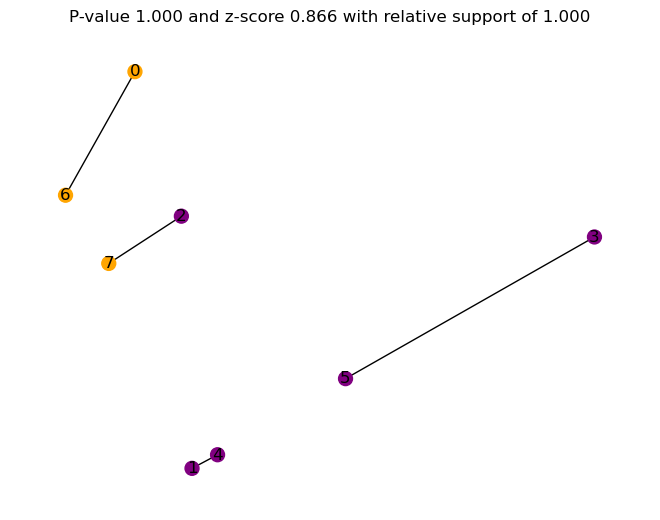

In [15]:
G = nx.Graph()
G.add_edges_from(nx_matching)
pos = {i: samples[i] for i in range(len(samples))}
labels = {i: i for i in range(len(samples))}
colors = adata.obs["Group"].replace({"A": "purple", "B": "orange"}).values
nx.draw(G, pos=pos, node_color=colors, labels=labels, node_size=100)
plt.title(f"P-value {p_val:.3f} and z-score {z:.3f} with relative support of {support:.3f}")
plt.show()

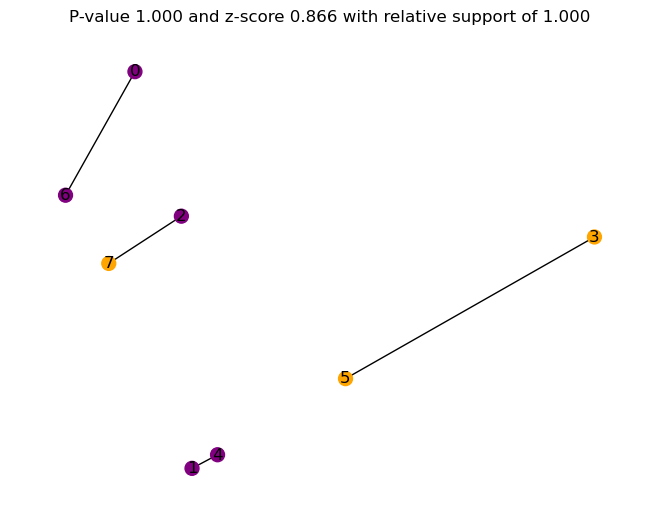

In [16]:
G = nx.Graph()
G.add_edges_from(gt_matching)
pos = {i: samples[i] for i in range(len(samples))}
labels = {i: i for i in range(len(samples))}
colors = adata.obs["Group"].replace({"A": "purple", "B": "orange"}).values
nx.draw(G, pos=pos, node_color=colors, labels=labels, node_size=100)
plt.title(f"P-value {p_val:.3f} and z-score {z:.3f} with relative support of {support:.3f}")
plt.show()

In [9]:
p_val, z, support = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=10)
print("P-value", p_val, "Z-score", z, "Relative support", support)

Original group counts:
Group
A    5
B    3
Name: count, dtype: int64
Filtered and downsampled samples:
Group
A    5
B    3
Name: count, dtype: int64
matching samples.
calculating PCA and kNN graph.


/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


extracting connectivities.
[[0.         0.         0.99864554 0.3910348  0.         0.01633742
  1.         0.45807135]
 [0.         0.         0.35497478 0.         1.         0.8284333
  0.         0.43765253]
 [0.99864554 0.35497478 0.         0.58409494 0.34190062 0.4798723
  0.960202   0.99999994]
 [0.3910348  0.         0.58409494 0.         0.         1.
  0.         0.3467885 ]
 [0.         1.         0.34190062 0.         0.         1.
  0.         0.53961986]
 [0.01633742 0.8284333  0.4798723  1.         1.         0.
  0.10295142 0.30030984]
 [1.         0.         0.960202   0.         0.         0.10295142
  0.         1.        ]
 [0.45807135 0.43765253 0.99999994 0.3467885  0.53961986 0.30030984
  1.         0.        ]]
assembling edges


42it [00:00, 2958.70it/s]

0 2   (0, 2)	0.998645544052124
  (0, 3)	0.3910348117351532
  (0, 5)	0.016337422654032707
  (0, 6)	1.0
  (0, 7)	0.45807135105133057
  (1, 2)	0.35497477650642395
  (1, 4)	1.0
  (1, 5)	0.8284332752227783
  (1, 7)	0.4376525282859802
  (2, 0)	0.998645544052124
  (2, 1)	0.35497477650642395
  (2, 3)	0.5840949416160583
  (2, 4)	0.34190061688423157
  (2, 5)	0.47987228631973267
  (2, 6)	0.9602019786834717
  (2, 7)	0.9999999403953552
  (3, 0)	0.3910348117351532
  (3, 2)	0.5840949416160583
  (3, 5)	1.0
  (3, 7)	0.3467884957790375
  (4, 1)	1.0
  (4, 2)	0.34190061688423157
  (4, 5)	1.0
  (4, 7)	0.5396198630332947
  (5, 0)	0.016337422654032707
  (5, 1)	0.8284332752227783
  (5, 2)	0.47987228631973267
  (5, 3)	1.0
  (5, 4)	1.0
  (5, 6)	0.10295142233371735
  (5, 7)	0.30030983686447144
  (6, 0)	1.0
  (6, 2)	0.9602019786834717
  (6, 5)	0.10295142233371735
  (6, 7)	1.0
  (7, 0)	0.45807135105133057
  (7, 1)	0.4376525282859802
  (7, 2)	0.9999999403953552
  (7, 3)	0.3467884957790375
  (7, 4)	0.539619863033294

In [10]:
p_val, z, support = rosenbaum(adata, group_by="Group", test_group="A", reference="C")
print("P-value", p_val, "Z-score", z, "Relative support", support)

Original group counts:
Group
A    5
B    3
Name: count, dtype: int64
Filtered and downsampled samples:
Group
A    5
Name: count, dtype: int64
matching samples.
using CPU to calculate distance matrix.
creating distance graph.
counting cross matches
P-value (1.0, nan, 1.0) Z-score [[0, 2], [1, 4]] Relative support <Graph object, undirected, with 6 vertices and 15 edges, 1 internal edge property, at 0x7f8ed28edc10>


/data/bionets/je30bery/rosenbaum_test/notebooks/../rosenbaum/rosenbaum.py:54: RuntimeWarning: invalid value encountered in scalar divide
  z = (a1 - E) / np.sqrt(var)


In [11]:
p_val, z, support = rosenbaum(adata, group_by="Group", test_group="A", reference="rest")
print("P-value", p_val, "Z-score", z, "Relative support", support)

matching samples.


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'